# k Nearest Neighbors

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html'>Regressor</a>
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>Classifier</a>

# n_neighbors

In [1]:
%matplotlib inline
%pylab inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division
from sklearn.datasets import load_iris

plt.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


#######
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print clf.score(X_test, y_test)

0.977777777778


In [3]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# metric

Есть разные метрики: <a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html'>sklearn.neighbors.DistanceMetric¶</a>

Например, метрика Минковского:
<img src="imgs/minkowski.svg">

<img src="imgs/distances.png">

In [4]:
# “euclidean”   EuclideanDistance    sqrt(sum((x - y)^2))
# “manhattan”   ManhattanDistance    sum(|x - y|)
# “chebyshev”   ChebyshevDistance    max(|x - y|)
# “minkowski”   MinkowskiDistance    sum(|x - y|^p)^(1/p)

Или вот крутые метрики из презентации Константина Вячеславовича Воронцова:<br>
<img src="imgs/voron_slide.jpg">

# weights

<img src="imgs/kernel_formula.jpg", width=600>
Есть разные ядерные функции:

<img src="imgs/kernels2.png">

<img src="imgs/kernel_formulas.jpg" width=400>

# Все параметры:

In [5]:
from sklearn.neighbors import KNeighborsClassifier

pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = "bry"
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


def plot_one(n_neighbors, metric, weights, p=2):
    clf = KNeighborsClassifier(algorithm='kd_tree',
                               n_neighbors=n_neighbors, 
                               metric=metric, 
                               weights=weights, 
                               p=p).fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

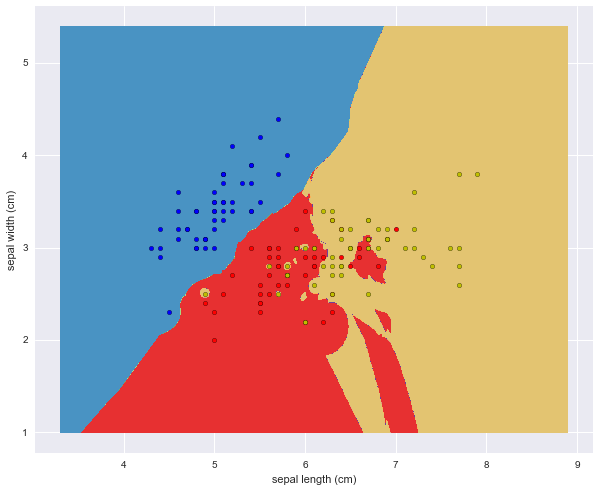

In [6]:
def gaussian_kernel(distances):
    if np.max(distances) == 0:
        return np.zeros(len(distances))
    distances_normalized = np.copy(distances) / np.max(distances)
    return np.e ** (-(distances_normalized ** 2) * 10)

from ipywidgets import interact, fixed
_ = interact(plot_one, 
             n_neighbors=(1, 20), 
             metric=('euclidean',  # sqrt(sum((x - y)^2))
                       'manhattan',  # sum(|x - y|)
                       'chebyshev',  # max(|x - y|)
                       'minkowski'  # sum(|x - y|^p)^(1/p)
                    ),
             weights={'uniform': 'uniform', 
                      'distance': 'distance',
                      'gaussian': gaussian_kernel},
             p=fixed(2) #[-0.99, 3, 0.5]
             )

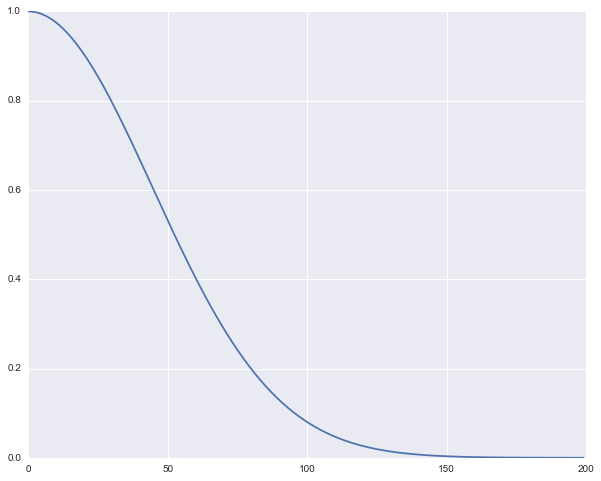

In [7]:
x = np.arange(0, 200, 1.)
plot(x, gaussian_kernel(x))

# Regression!

In [8]:
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# y = np.piecewise(X.flatten(), [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

def plot_one(n_neighbors, metric, weights, p=2):
    plt.figure(figsize=(10, 7))
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, 
                              metric=metric,
                              weights=weights,
                              p=p)
    y_ = knn.fit(X, y).predict(X_test)
    print knn
    plt.scatter(X, y, c='darkorange', label='data')
    plt.plot(X_test, y_, c='cornflowerblue', label='prediction')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric=u'euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2.0,
          weights='distance')


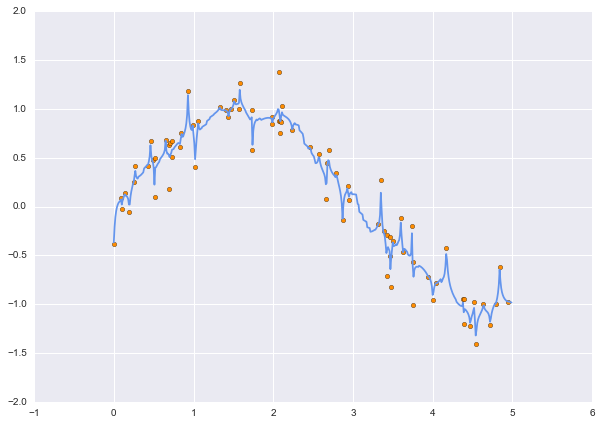

In [9]:
_ = interact(plot_one, 
             n_neighbors=(1, 20), 
             metric=('euclidean',  # sqrt(sum((x - y)^2))
                       'manhattan',  # sum(|x - y|)
                       'chebyshev',  # max(|x - y|)
                       'minkowski'  # sum(|x - y|^p)^(1/p)
                    ),
             weights={'uniform': 'uniform', 
                      'distance': 'distance',
                      'gaussian': gaussian_kernel},
             p=[1, 3, 0.5]
             )

# Проклятие размерности: 
http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#the-curse-of-dimensionality
<img src="imgs/the_curse.png">

<img src="http://img10.deviantart.net/3d83/i/2016/306/6/b/__hello__neighbor____by_noodlegirl35-dan3vp8.png" width=400>